**In Class Activity 3**

Submitted by : Group 2


| Name | Student ID |
| --- | --- |
| Rajan Ghimire (Group Leader) | C0924991 |
| Aarjeyan Shrestha | C0927422 |
| Sudip Chaudhary | C0922310 |




<br>


In [11]:
# importing all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go

In [12]:
# read the dataframe.
df = pd.read_csv("data.csv",delimiter=",",encoding="utf-8")


# print 3 rows of dataframe
df.head(3)

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0


In [13]:
# dataframe tail visualization 
df.tail(3)

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
221043,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00635000,12/15/2023,635.0,P,A,211.50,...,0.14831,0,0,430.26,*,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00640000,12/15/2023,640.0,C,A,2.73,...,0.14831,5,1,430.26,*,0.048170,0.672488,0.000997,-0.005217,0.463973
221045,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00640000,12/15/2023,640.0,P,A,216.50,...,0.14831,0,0,430.26,*,-0.931634,0.672488,0.000997,-0.010467,-15.169052


### Data Acquisition & Filtering


**Dynamically renaming all the column names.**

In [14]:
updated_names = []

for name in df.columns:
    
    splitted_name = name.lower().split(" ")

    updated_names.append("_".join(splitted_name))


df.columns = updated_names

df.head()

,symbol,exchange,date,adjusted_close,option_symbol,expiration,strike,call/put,style,ask,...,iv,volume,open_interest,stock_price_for_iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


**Identifiying the categorical and non categorical features of the dataset.**

In [15]:
# Step 1: Get the object type of non categorical varibale.
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {cat_columns}")

# Step 2: Get all numeric data types
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
print(f"Numerical columns: {numerical_cols}")


print(f"Total Columns in datase: {df.shape[1]}")
print(f"Identified data type: {len(cat_columns) + len(numerical_cols)}")

assert df.shape[1] == len(cat_columns) + len(numerical_cols) , "Some columns not indentified."

Categorical columns: ['symbol', 'exchange', 'date', 'option_symbol', 'expiration', 'call/put', 'style', '*']
Numerical columns: ['adjusted_close', 'strike', 'ask', 'bid', 'mean_price', 'iv', 'volume', 'open_interest', 'stock_price_for_iv', 'delta', 'vega', 'gamma', 'theta', 'rho']
Total Columns in datase: 22
Identified data type: 22


**Check if dataset has null values**

In [16]:
df.isna().sum() 

symbol                     0
exchange                   0
date                       0
adjusted_close             0
option_symbol              0
expiration                 0
strike                     0
call/put                   0
style                      0
ask                        0
bid                        0
mean_price                 0
iv                         0
volume                     0
open_interest              0
stock_price_for_iv         0
*                     192007
delta                      0
vega                       0
gamma                      0
theta                      0
rho                        0
dtype: int64

**As we can see that the * column has a lot of missing values, we deciced to simply drop the column.**

In [17]:
cat_columns.remove('*')
df.drop(['*'],axis=1, inplace=True)
print(f"Total observations in data is {df.shape[0]} and total features in dataset is {df.shape[1]}")

Total observations in data is 221046 and total features in dataset is 21


### Data Extraction

**Here we convert all the categorical data into a numerical representation and other necessary converstion and feature scaling**

In [18]:
# Convert date columns to datetime objects
df['date'] = pd.to_datetime(df['date'])

df['expiration'] = pd.to_datetime(df['expiration'])


### Data Validation and Cleansing

**Using box and whisker plot to check if there are any outliers in the data.**

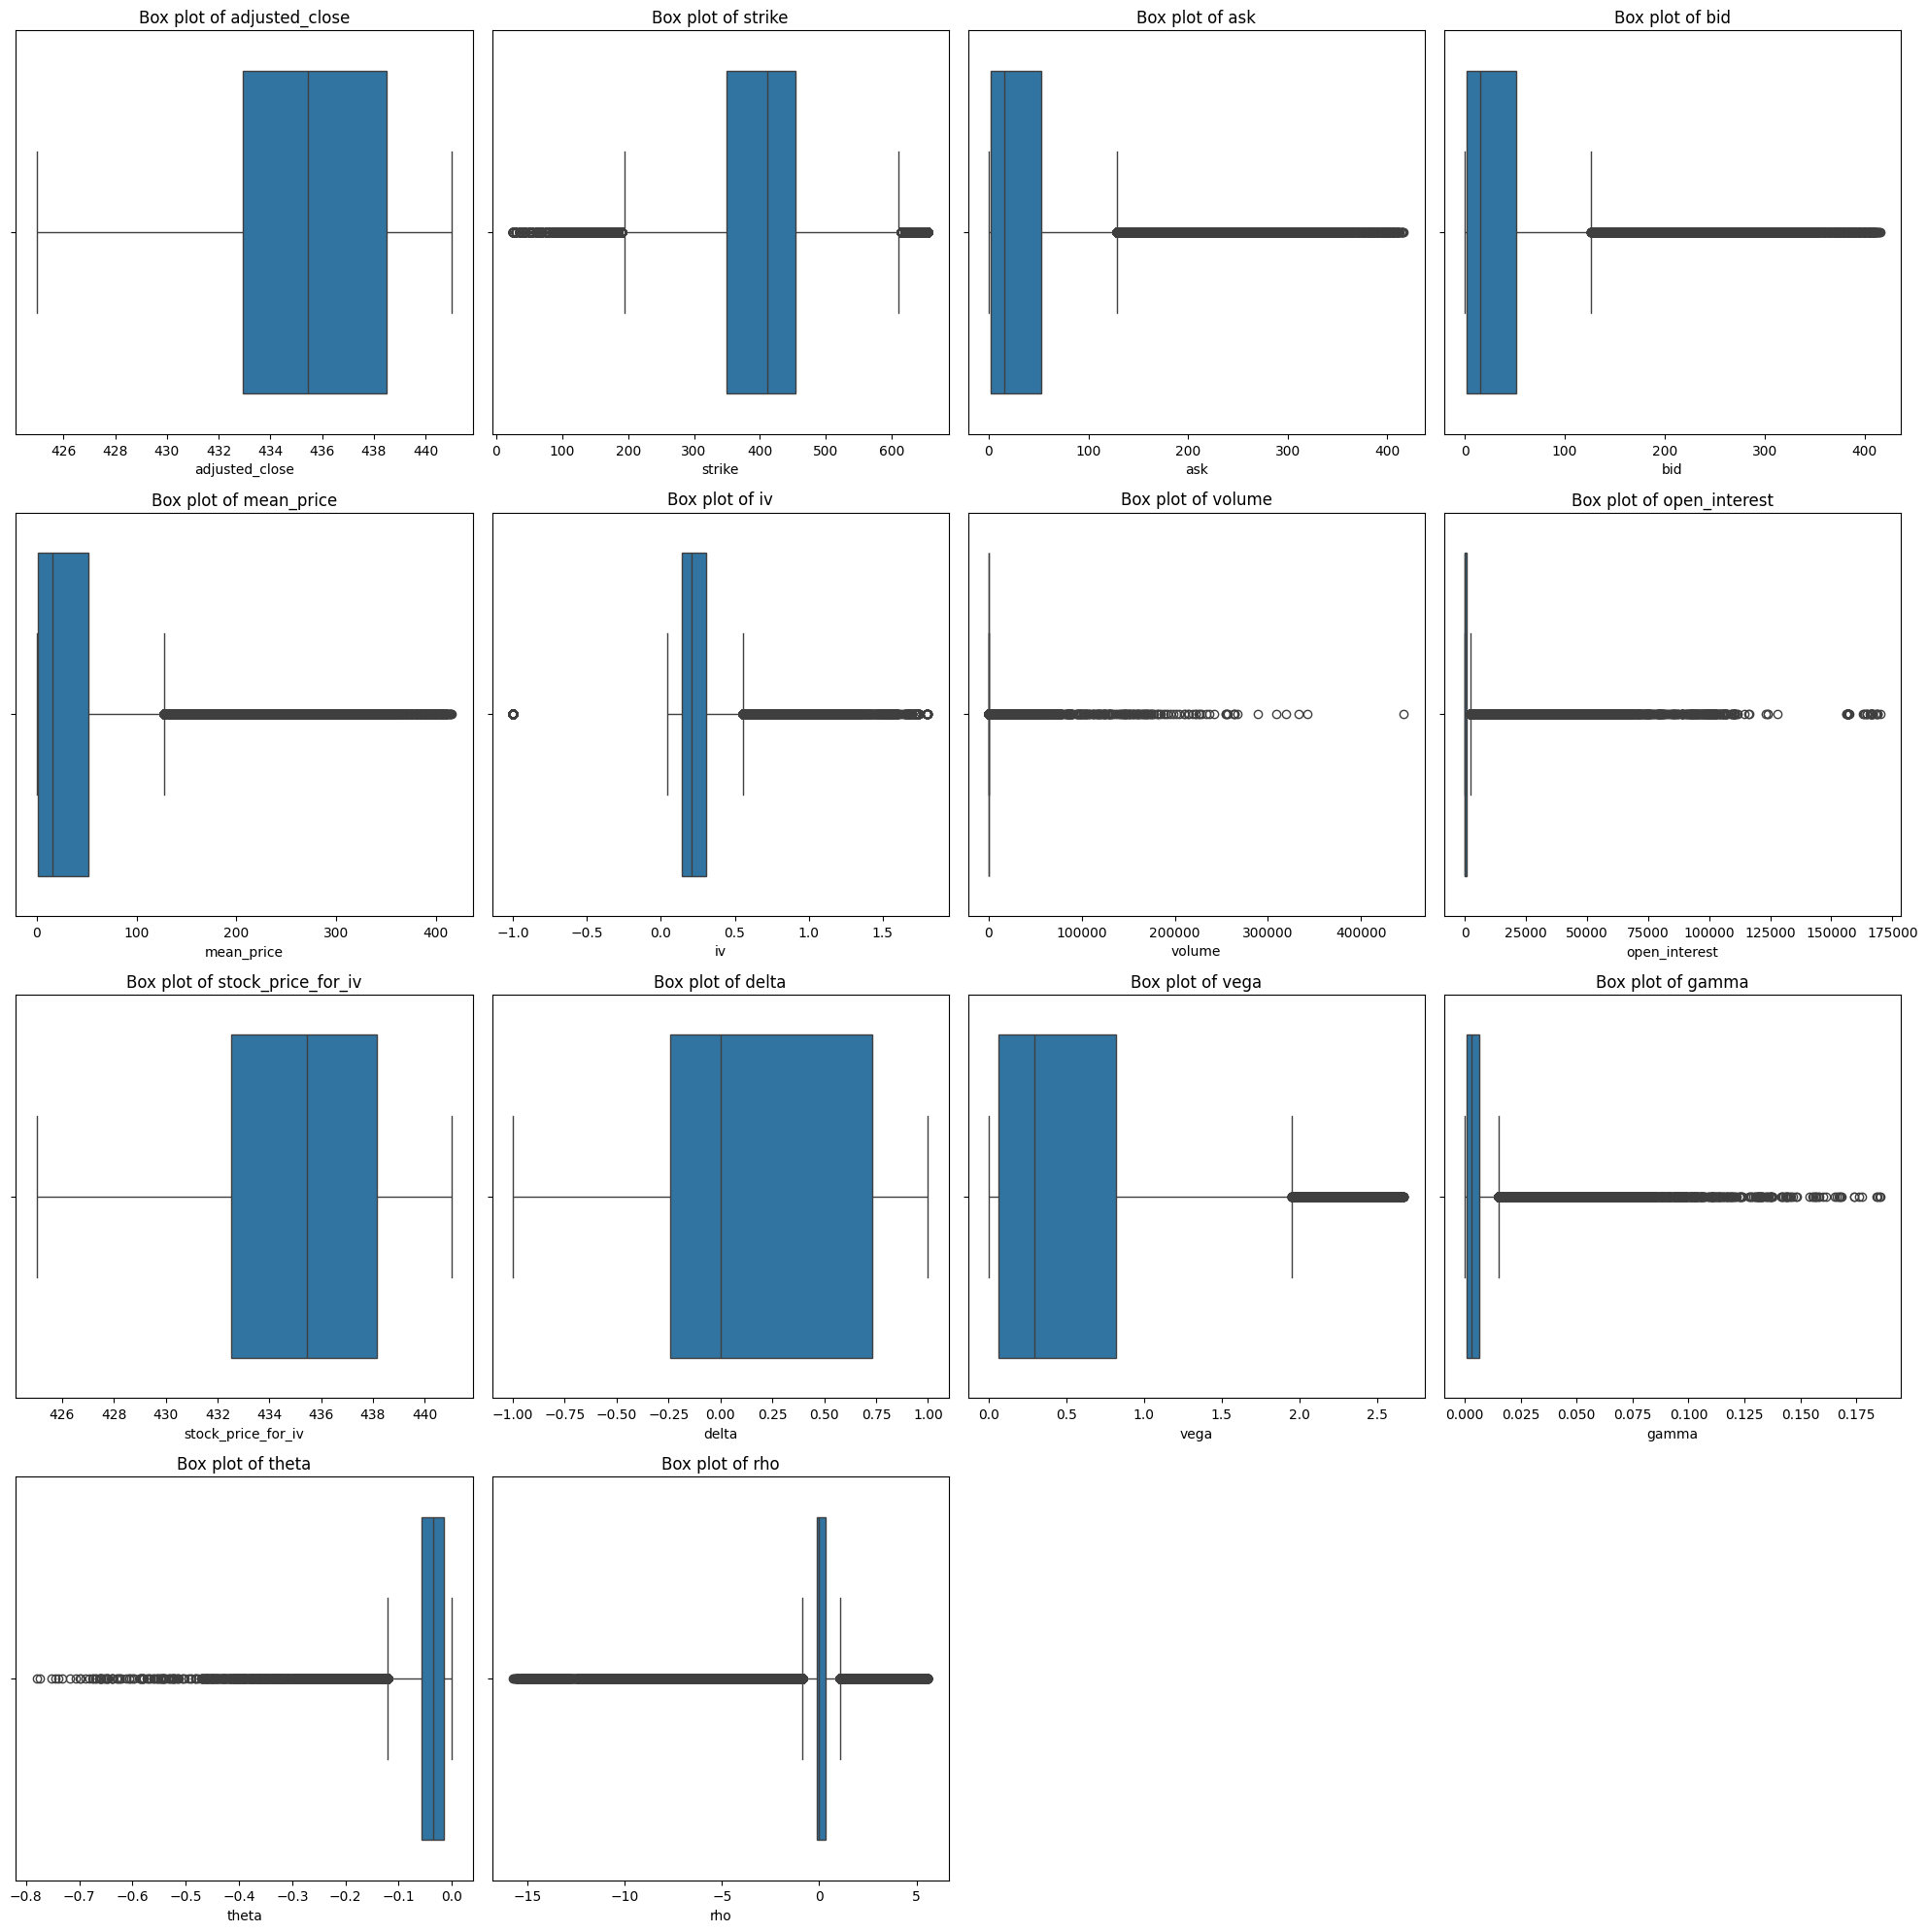

In [19]:
# Number of images in a column
n_cols = 4
#  required number of rows
n_rows = 4  

# Create a subplot grid
plt.figure(figsize=(20,20))  # Adjust figure size as needed

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

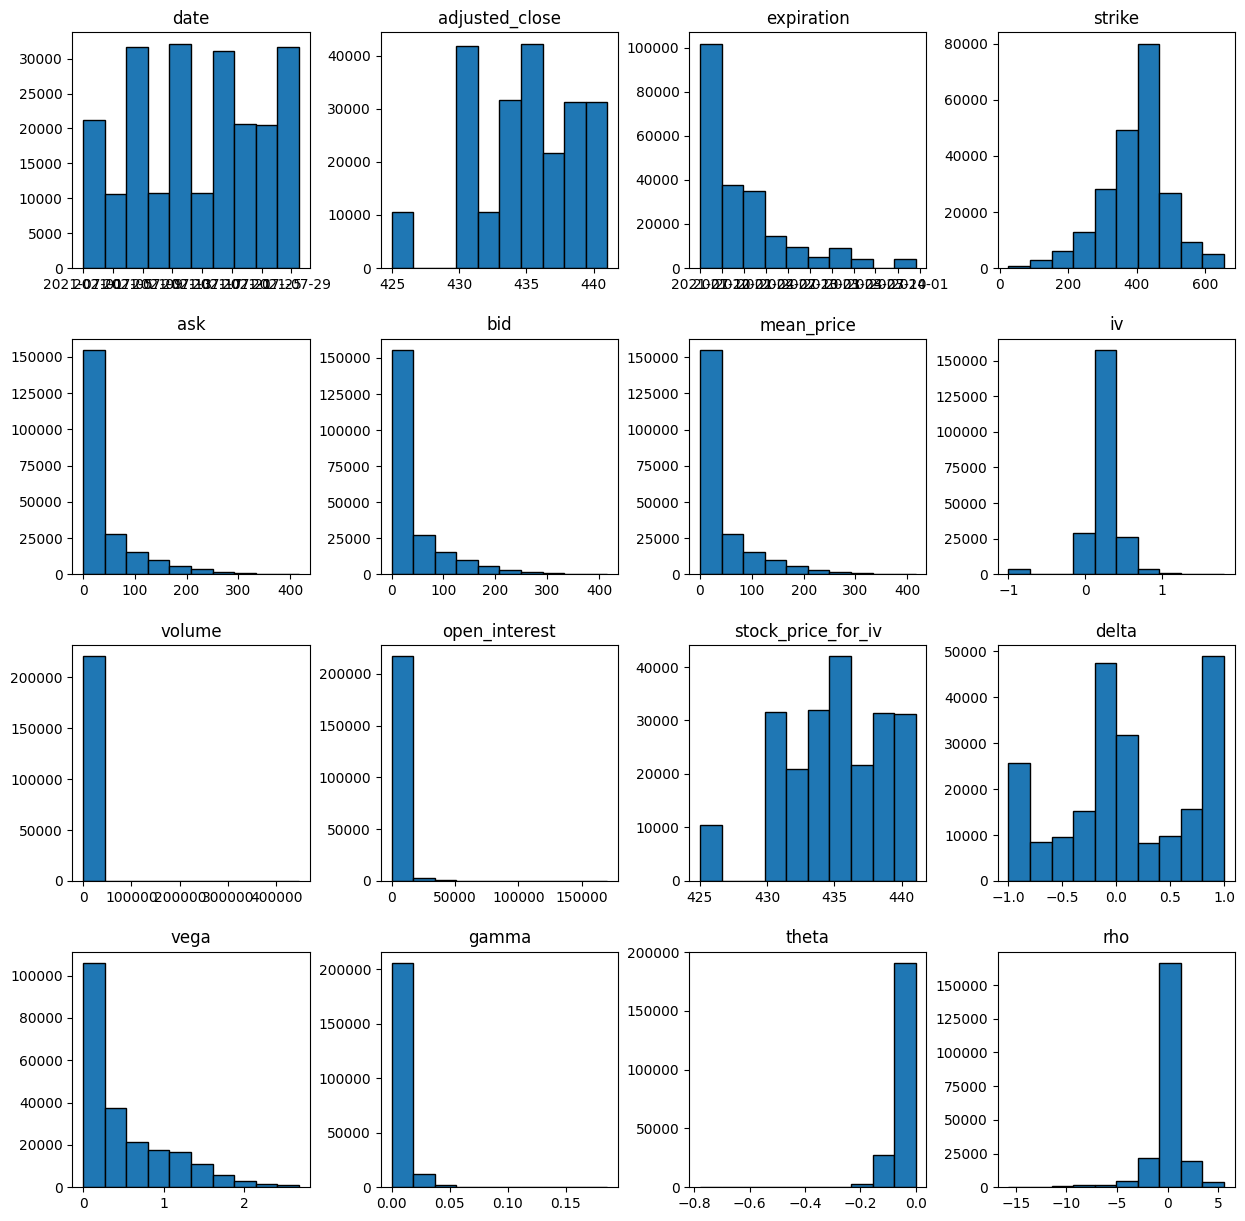

In [20]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(15,15))
ax = fig.gca()

#create histogram using specified figure size
diagram = df.hist(grid=False, edgecolor='black',ax=ax)

### 1) Compare your Activity 2 result with and without first scaling your dataset.


### ```Without scaling```

### Data Aggregation & Representation on dataset without scaling

**Performing time series analysis of the numerical varibales**

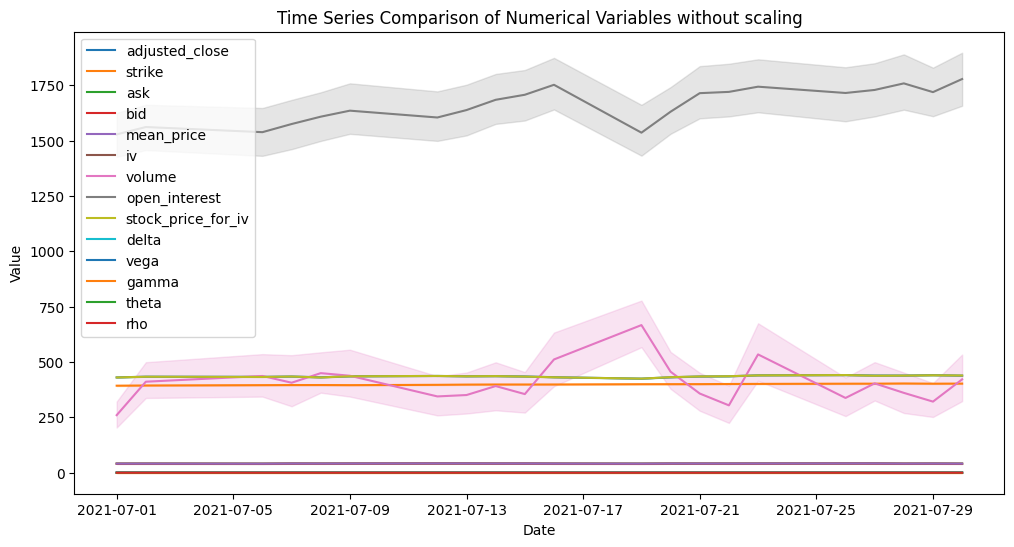

In [21]:
# copying the main df into a plotting dataframe
plot_df = df.copy()

# setting date as an index
plot_df.set_index('date', inplace=True)

plt.figure(figsize=(12, 6))

for col in numerical_cols:
    sns.lineplot(data=plot_df, x=plot_df.index, y=col, label=col)

plt.title('Time Series Comparison of Numerical Variables without scaling')
plt.ylabel('Value')
plt.xlabel('Date')
plt.legend()
plt.show()

### ```After scaling```

##### Scaling using StandardScaler() for all the numbrical values and performing label encoding for all categorical variables

In [22]:
from sklearn.preprocessing import StandardScaler

# Scaling all the numerical values for fitting and transforming the data
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


from sklearn.preprocessing import LabelEncoder

# performing label encdoing for all categorical variables except 'date' variable as date conversion is not handeled by Label Encoder.
label_encoder = LabelEncoder()

for column in cat_columns:
    if column not in ["date","expiration"]:
        df[column] = label_encoder.fit_transform(df[column])
        #This maps each unique category to a corresponding integer index, updating the respective column in the DataFrame 'df'.

### Data Aggregation & Representation on dataset after scaling

**Performing time series analysis of the numerical varibales**

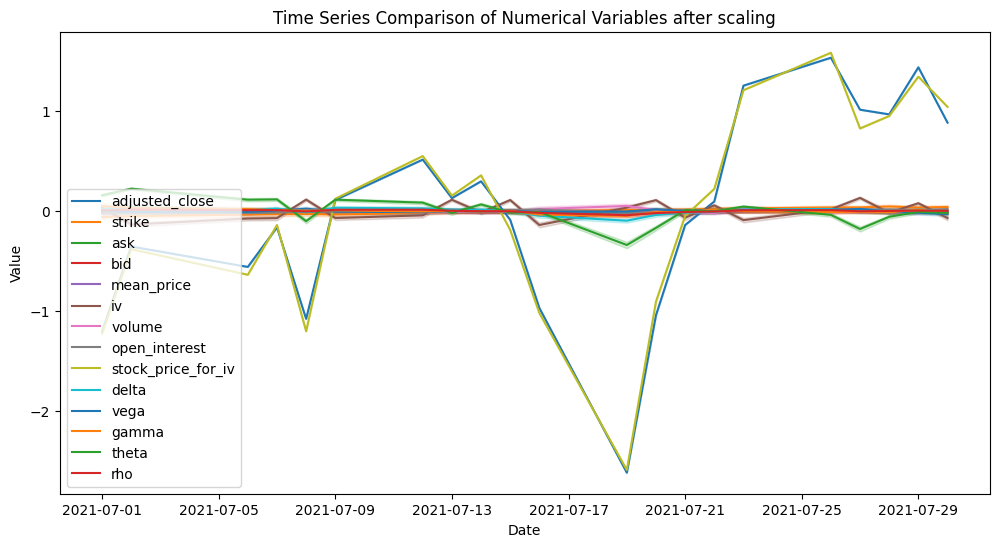

In [23]:
# copying the main df into a plotting dataframe
plot_df = df.copy()

# setting date as an index
plot_df.set_index('date', inplace=True)

plt.figure(figsize=(12, 6))

for col in numerical_cols:
    sns.lineplot(data=plot_df, x=plot_df.index, y=col, label=col)

plt.title('Time Series Comparison of Numerical Variables after scaling')
plt.ylabel('Value')
plt.xlabel('Date')
plt.legend()
plt.show()

# Question 2

### 2) Engineer a new feature and compare your Activity 2 results with and without this new feature.

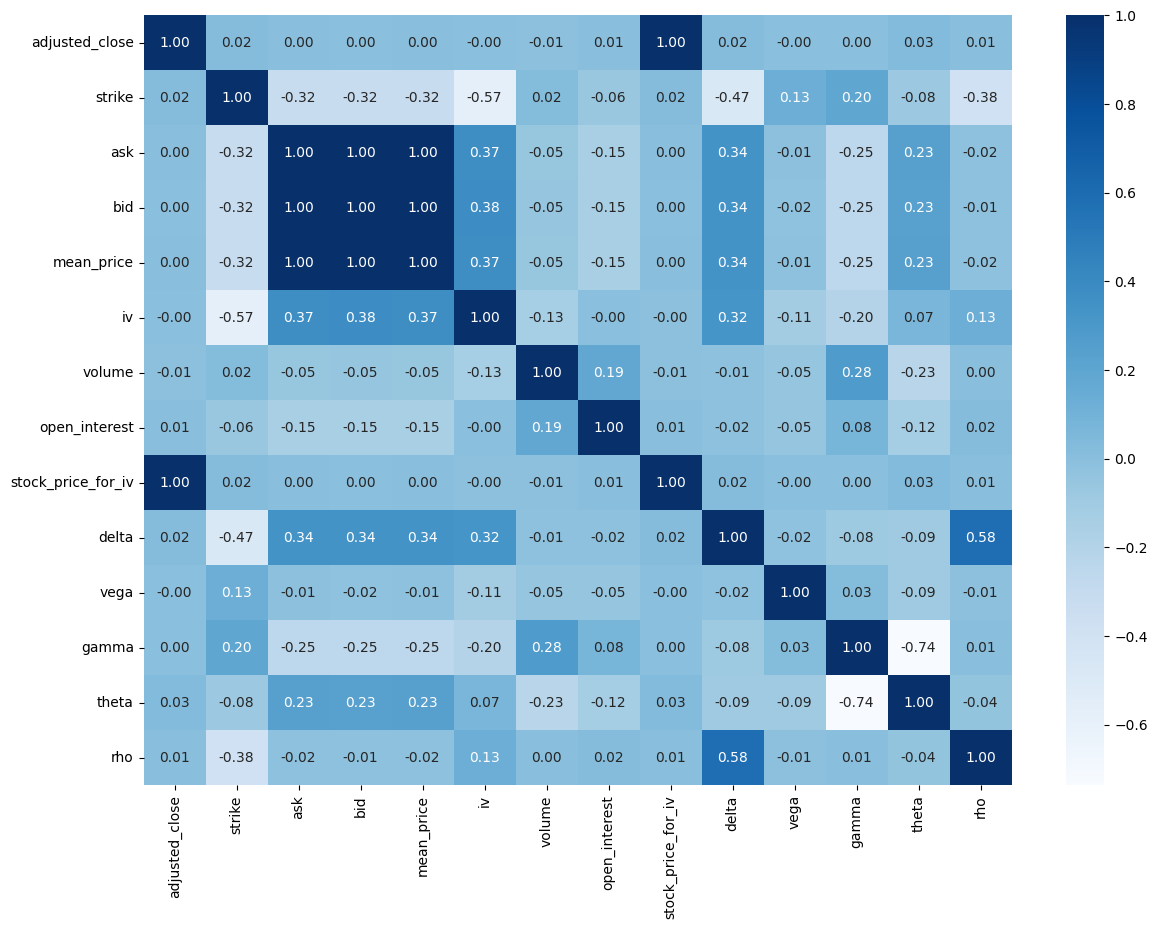

In [24]:
# isolating the dataframe with numerical values only
df_numerical = df.loc[:,numerical_cols]

plt.figure(figsize=(14, 10))
sns.heatmap(df_numerical.corr(), annot=True, fmt=".2f", cmap='Blues')
plt.show()

From the given co-relation plot, we decided to drop stock_price_for_iv, bid as they have 1 co-relation and choosing one feature will work the same.

In [25]:
df = df.drop(["bid","stock_price_for_iv"], axis=1)

### Adding new feature as mean of ```gamma```, ```vega``` and ```delta```.

```df_feature_add``` = New data frame with added feature<br>
```df``` = Deafult dataframe

In [26]:
# Copying dataframe to another dataframe
df_feature_add = df.copy()

# Calculating the mean of three columns and adding it as a new column
df_feature_add['gvd_mean'] = df_feature_add[["gamma","vega","delta"]].mean(axis=1)

# dropping the existing gamma, vega and delta
df_feature_add.drop(["gamma","vega","delta"],axis=1, inplace=True)

In [27]:
df_feature_add.head()

,symbol,exchange,date,adjusted_close,option_symbol,expiration,strike,call/put,style,ask,mean_price,iv,volume,open_interest,theta,rho,gvd_mean
0,0,0,2021-07-30,0.88537,3234,2021-07-30,-1.960004,0,0,3.022788,3.034433,-5.479198,-0.079547,-0.274928,1.05348,0.039104,-0.566622
1,0,0,2021-07-30,0.88537,3388,2021-07-30,-1.960004,1,0,-0.688499,-0.686434,-5.479198,-0.079547,-0.042999,1.05348,0.039104,-0.566622
2,0,0,2021-07-30,0.88537,3235,2021-07-30,-1.906657,0,0,2.940149,2.951361,-5.479198,-0.079547,-0.274762,1.05348,0.039104,-0.566622
3,0,0,2021-07-30,0.88537,3389,2021-07-30,-1.906657,1,0,-0.688499,-0.686434,-5.479198,-0.069743,-0.220629,1.05348,0.039104,-0.566622
4,0,0,2021-07-30,0.88537,3236,2021-07-30,-1.853310,0,0,2.857511,2.868289,-5.479198,-0.079547,-0.274928,1.05348,0.039104,-0.566622


##### Feature Engineering for "added feature"

In [28]:
# Selecting the features
# input features 
input_features = df_feature_add.columns.to_list()
input_features.remove("mean_price")
input_features.remove("expiration")
input_features.remove("date")


# target feature
target = "mean_price"


# Split data into training and testing sets
train_df = df_feature_add[df_feature_add['expiration'] < '2021-07-30']

# as mentioned in question, we can use expiration 2021-07-30 for validation.
test_df = df_feature_add[df_feature_add['expiration'] == '2021-07-30']

X_train = train_df[input_features]
y_train = train_df[target]
X_test = test_df[input_features]
y_test = test_df[target]

Using ```RandomForestRegressor``` to find out the top ```N``` features

In [29]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor


rf1 = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the random forest Regressor
rf1.fit(X_train, y_train)

# now listing all the important features
feature_importances = rf1.feature_importances_
feature_names = X_train.columns

# Sort the feature importances in descending order
sorting_features_names = np.argsort(feature_importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
for idx in sorting_features_names:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")


    


Feature ranking:
ask: 0.9999804932022374
strike: 1.5357869479874694e-05
adjusted_close: 1.1280397469482797e-06
iv: 9.854938608474923e-07
theta: 5.023136070749193e-07
gvd_mean: 4.6217598450887126e-07
rho: 4.3558291238042326e-07
option_symbol: 4.1881022201123614e-07
open_interest: 1.2441669694543536e-07
volume: 7.410126334729142e-08
call/put: 1.799398860925606e-08
style: 0.0
exchange: 0.0
symbol: 0.0


### Model building for added feature (gvd_mean)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, r2_score

# From the N features listed by the random forest regressor, we can choose 'N' features, for this example 
# We are using 6 Features 

N = 10

top_features = []
for i in sorting_features_names[:N]:

    top_features.append(feature_names[i])


# Lets update train and test data based on the top features
X_train_feature_selected = X_train[top_features]
X_test_feature_selected = X_test[top_features]

# Train a regression model 
model = LinearRegression()
model.fit(X_train_feature_selected, y_train)


predictions = model.predict(X_test_feature_selected)


##### Evaluation

In [31]:
# Evaluate the new model
mse_with_feature = mean_squared_error(y_test, predictions)
r2_with_feature = r2_score(y_test, predictions)

print("Mean Squared Error with selected features with feature addition:", mse_with_feature)
print("R^2 Score with selected features with feature addition:", r2_with_feature)

evs_with_feature = explained_variance_score(y_test, predictions)
print("Explained Variance Score with feature addition:", evs_with_feature)

mape_with_feature = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error with feature addition:", mape_with_feature)


Mean Squared Error with selected features with feature addition: 1.7145080420519072e-06
R^2 Score with selected features with feature addition: 0.9999970293992367
Explained Variance Score with feature addition: 0.99999703681956
Mean Absolute Percentage Error with feature addition: 0.7873825019815359


### Creating visualization for the model with added features

In [32]:

# Error Metrics Visualization
metrics = ['MSE', 'R^2', 'EVS', 'MAPE']
values_feature = [mse_with_feature, r2_with_feature, evs_with_feature, mape_with_feature]



# Create a bar graph
fig = go.Figure()

fig.add_trace(go.Bar(
    x=metrics,
    y=values_feature,
    marker=dict(color='rgb(155, 100, 230)'),
    name='Model Metrics'
))

# Customize layout
fig.update_layout(
    title='Metrics of the Model with added feature',
    xaxis=dict(title='Metrics'),
    yaxis=dict(
        title='Values',
        type='log',
    ),
    showlegend=False
)

fig.show()


## Training on dataset without added feature (default model)

###  Feature Engineering for default

In [33]:
# Selecting the features
# input features 
input_features = df.columns.to_list()
input_features.remove("mean_price")
input_features.remove("date")
input_features.remove("expiration")

target = "mean_price"


In [34]:
# Split data into training and testing sets
train_df = df[df['expiration'] < '2021-07-30']

# as mentioned in question, we can use date 2021-07-30 for validation.
test_df = df[df['expiration'] == '2021-07-30']

X_train = train_df[input_features]
y_train = train_df[target]
X_test = test_df[input_features]
y_test = test_df[target]

Using ```RandomForestRegressor``` to rank all the features. 
And, based on the features we can select top ```N``` features.

In [35]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor


rf2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the random forest Regressor
rf2.fit(X_train, y_train)

# now listing all the important features
feature_importances = rf2.feature_importances_
feature_names = X_train.columns

# Sort the feature importances in descending order
sorting_features_names = np.argsort(feature_importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
for idx in sorting_features_names:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")


Feature ranking:
ask: 0.9999796243544528
strike: 1.609931944806293e-05
adjusted_close: 1.0605818225715268e-06
iv: 8.89934711823112e-07
delta: 5.664242781992469e-07
theta: 4.4528131741116826e-07
option_symbol: 4.037937658882663e-07
rho: 4.0338498828041004e-07
vega: 1.5709207201658013e-07
gamma: 1.3836849357878812e-07
open_interest: 1.2485383733868962e-07
volume: 6.844719863115591e-08
call/put: 1.8163613587880575e-08
style: 0.0
exchange: 0.0
symbol: 0.0


### Model Building for default

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, r2_score

# From the N features listed by the random forest regressor, we can choose 'N' features, for this example 
# We are using 6 Features 

N = 10

top_features = []
for i in sorting_features_names[:N]:

    top_features.append(feature_names[i])


# Lets update train and test data based on the top features
X_train_feature_selected = X_train[top_features]
X_test_feature_selected = X_test[top_features]

# Train a regression model 
model = LinearRegression()
model.fit(X_train_feature_selected, y_train)


predictions = model.predict(X_test_feature_selected)


**Evaluation**

In [37]:
# Evaluate the new model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error with selected features:", mse)
print("R^2 Score with selected features:", r2)

evs = explained_variance_score(y_test, predictions)
print("Explained Variance Score:", evs)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)




Mean Squared Error with selected features: 1.6208437877508292e-06
R^2 Score with selected features: 0.9999971916843345
Explained Variance Score: 0.9999972027151606
Mean Absolute Percentage Error: 0.7435427023965452


### Creating visualization for the default/original model 

In [38]:
# Error Metrics Visualization
metrics = ['MSE', 'R^2', 'EVS', 'MAPE']
values = [mse, r2, evs, mape]


# Create a bar graph
fig = go.Figure()

fig.add_trace(go.Bar(
    x=metrics,
    y=values,
    marker=dict(color='rgb(55, 100, 130)'),
    name='Model Metrics'
))

# Customize layout
fig.update_layout(
    title='Metrics of the Original Model',
    xaxis=dict(title='Metrics'),
    yaxis=dict(
        title='Values',
        type='log',
    ),
    showlegend=False
)

fig.show()

# Question 3


### 3) Use Dimension Reduction ```PCA``` to rank the importance of each feature and compare your Activity 2 result with a new model that uses only the features that contribute to 90% of the information in the dataset.

In [39]:

# imorting PCA
from sklearn.decomposition import PCA

# Taking feature theat contributes to 90% of feature only.
pca = PCA(n_components=0.9)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)



In [40]:
#using LinearRegression
lr = LinearRegression()


lr.fit(X_train_pca, y_train)


predictions = lr.predict(X_test_pca)


In [41]:
# Evaluation of the new model using PCA
mse_pca = mean_squared_error(y_test, predictions)
r2_pca = r2_score(y_test, predictions)

print("Mean Squared Error with selected features with PCA:", mse_pca)
print("R^2 Score with selected features with PCA:", r2_pca)

evs_pca = explained_variance_score(y_test, predictions)
print("Explained Variance Score with PCA:", evs_pca)

mape_pca = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error with PCA:", mape_pca)




Mean Squared Error with selected features with PCA: 0.5894908272183881
R^2 Score with selected features with PCA: -0.021366980097818455
Explained Variance Score with PCA: 0.011180610469691765
Mean Absolute Percentage Error with PCA: 214.90920140879953


### Creating visualization for the model using PCA

In [42]:
# Error Metrics Visualization
metrics = ['MSE', 'R^2', 'EVS', 'MAPE']
values_PCA = [mse_pca,r2_pca,evs_pca,mape_pca]

# Create a bar graph
fig = go.Figure()

fig.add_trace(go.Bar(
    x=metrics,
    y=values_PCA,
    marker=dict(color='rgb(55, 83, 200)'),
    name='Model Metrics'
))

# Customize layout
fig.update_layout(
    title='Metrics of the model using PCA',
    xaxis=dict(title='Metrics'),
    yaxis=dict(
        title='Values',
        type='log',
    ),
    showlegend=False
)

fig.show()

# ALL Models Comparision

### Visualization for the comparision of Default and Feature added model

In [43]:
import plotly.graph_objects as go

metrics_names = ['MSE', 'R^2', 'EVS', 'MAPE']

# Create traces
trace1 = go.Bar(
    x=metrics_names,
    y=values,
    name='Model 1',
    marker=dict(color='rgb(55, 83, 109)')
)
trace2 = go.Bar(
    x=metrics_names,
    y=values_feature,
    name='Model 2',
    marker=dict(color='rgb(26, 118, 255)')
)

data = [trace1, trace2]

layout = go.Layout(
    title='Comparison of Default and Feature Added model.',
    xaxis=dict(title='Metrics'),
    yaxis=dict(
        title='Values',
        type='log',
    ),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
fig.show()


### Visualization for the comparision of Default model and model using PCA

In [44]:
import plotly.graph_objects as go

metrics_names = ['MSE', 'R^2', 'EVS', 'MAPE']

# Create traces
trace1 = go.Bar(
    x=metrics_names,
    y=values,
    name='Model 1',
    marker=dict(color='rgb(255, 83, 109)')
)
trace2 = go.Bar(
    x=metrics_names,
    y=values_PCA,
    name='Model 2',
    marker=dict(color='rgb(26, 118, 255)')
)

data = [trace1, trace2]

layout = go.Layout(
    title='Comparison of Default and PCA model.',
    xaxis=dict(title='Metrics'),
    yaxis=dict(
        title='Values',
        type='log',
    ),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
fig.show()
